# Plot location buoys

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import netCDF4 as nc4
import xarray as xr
import pandas as pd

from src.utils import modif_plot

# Import Lat Lon in-situ obs

In [16]:
def import_uls(ifile):
    '''
    Return sea ice thickness, SIT standard deviation, latitude, longitude and time
    
    ADCP only have daily values >> no standard deviation
    
    Parameters:
    -----------
        ifile     :   string, absolute path of the .nc file to open
    '''
    nc = nc4.Dataset(f'{ifile}', mode='r')
    sit = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sit']
    
    if 'ADCP' in ifile:
        sit_std = None
    else:
        sit_std = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sit_std']

    lat = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['lat']
    lon = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['lon']

    chrono = pd.DataFrame({'date':pd.to_datetime(sit.time)})

    chrono_dt_uls = np.array([dt.date() for dt in chrono.date])
    
    return sit, sit_std, lat, lon, chrono_dt_uls

In [17]:
mtp = {}  # moorings to plot

In [18]:
# BEPG
b_dir = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_BGEP/netcdf/'
b_list = ['ulsA_2003_2018.nc', 'ulsB_2003_2018.nc', 'ulsC_2003_2018.nc', 'ulsD_2003_2018.nc']

In [19]:
for n, buoy in enumerate(b_list):
    # open netcdf
    _, _, lat, lon, _ = import_uls(f'{b_dir}{buoy}')
    # save lat lon
    name_buoy = f'b_{n}'
    mtp[name_buoy] = [lat.to_numpy()[0], lon.to_numpy()[0], 'BGEP']

In [20]:
# NPEO
n_dir = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/ULS_NPEO/netcdf/uls_NPEO_2001_2008.nc'

In [21]:
# open netcdf
_, _, lat, lon, _ = import_uls(f'{n_dir}')
# save lat lon
name_buoy = f'n_0'
mtp[name_buoy] = [lat.to_numpy()[0], lon.to_numpy()[0], 'NPEO']

In [22]:
mtp

{'b_0': [75.000139, -149.96685, 'BGEP'],
 'b_1': [78.016803, -149.816723, 'BGEP'],
 'b_2': [76.983398, -139.900156, 'BGEP'],
 'b_3': [74.000018, -139.983467, 'BGEP'],
 'n_0': [89.550114, 66.633561, 'NPEO']}

# Plot

In [23]:
colors = ['#AC2E19', '#19AC2E', '#2E19AC']
# colors = ['r'] + ['k']*100

In [24]:
mtp

{'b_0': [75.000139, -149.96685, 'BGEP'],
 'b_1': [78.016803, -149.816723, 'BGEP'],
 'b_2': [76.983398, -139.900156, 'BGEP'],
 'b_3': [74.000018, -139.983467, 'BGEP'],
 'n_0': [89.550114, 66.633561, 'NPEO']}

In [25]:
def get_color(name):
    if 'b' in name:
        return colors[0]
    elif 'n' in name:
        return colors[1]
    elif 't' in name:
        return colors[2]

Figure saved as: Buoys_locations.png


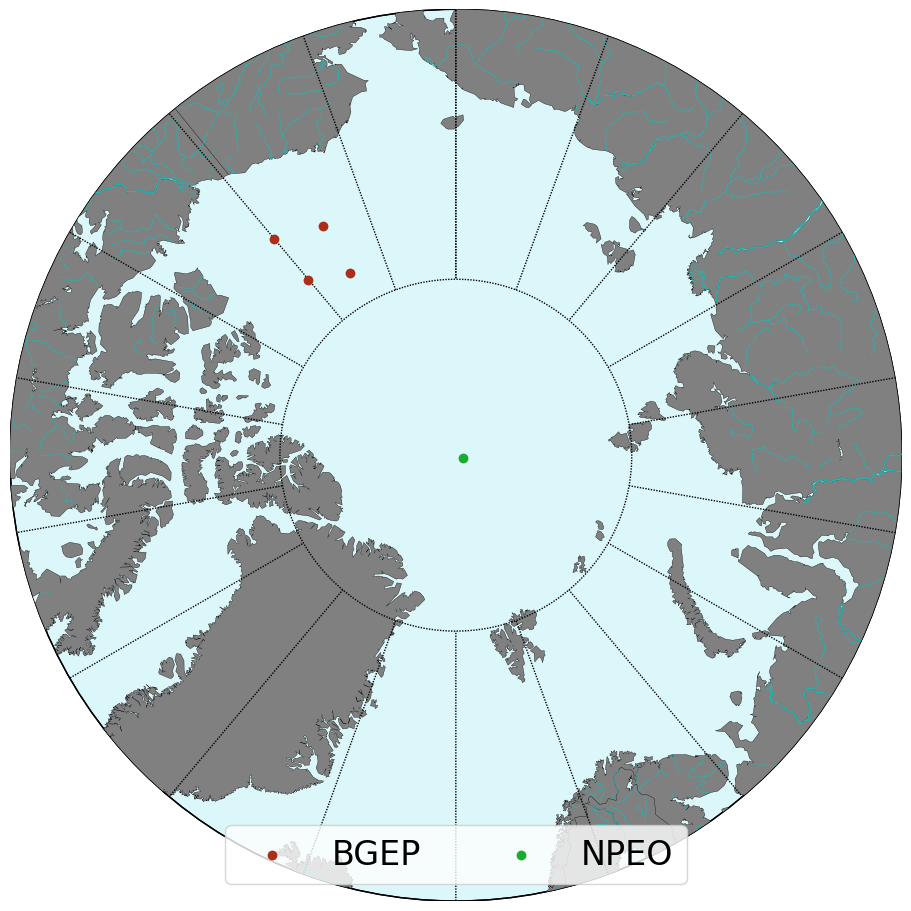

In [26]:
fig, ax = plt.subplots(figsize=(16, 9), constrained_layout=True)

m = Basemap(projection='npstere', boundinglat=65, lon_0=0, resolution='l', round=True, ax=ax)

# draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)

m.fillcontinents(color='grey', lake_color='#DCF7FA')
m.drawrivers(color='#1EB8B3')
m.drawmapboundary(fill_color='#DCF7FA')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.));

for n, item in enumerate(mtp):
    cl = get_color(item)
    if '0' in item:  # c=cl
        m.scatter(mtp[item][1], mtp[item][0], c=cl, s=50, label=mtp[item][2], lw=0, latlon=True, zorder=10)
    else:
        m.scatter(mtp[item][1], mtp[item][0], c=cl, s=50, lw=0, latlon=True, zorder=10)
        
        
ax.legend(loc='lower center', fancybox=True, fontsize=24, ncols=3) # framealpha=0.5
# modif_plot.resize(fig, s=20)


# if savefig:
ofile = 'Buoys_locations.png'
plt.savefig(f'{ofile}', bbox_inches='tight')
print(f'Figure saved as: {ofile}')

# if plt_sh:
#     plt.show()

# plt.close()